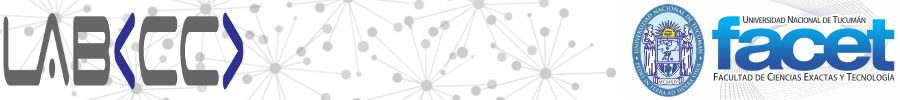

# Pandas

Pandas es una librería/paquete de Python que permite manipular datos de una manera muy simple y eficiente. Tiene por objetivo ser una herramienta flexible para el analisis de datos de alta performance.

Algunas características:
- Maneja dos tipos fundamentales de estructuras de datos: DataFrame y DataSeries
- Estructura DataFrame rápida y eficiente con indexación predeterminada y personalizada.
- Herramientas para cargar datos en desde diferentes formatos de archivo.
- Manejo integrado de datos faltantes.
- Remodelación y pivoteo de conjuntos de datos.
- Slicing, indexación y subconjunto de grandes conjuntos de datos basados en etiquetas.
- Posibilidad de eliminar o insertar columnas de una estructura de datos.
- Agregación y las transformaciones de datos.
- Fusión y unión de datos de alto rendimiento.
- Funcionalidades para series temporales.

## Tipo de dato DataFrame

Pandas nos ofrece un tipo de datos particilar para la manipulación de datos "tabulados".

Así como con los tipos de datos que vimos anteriormente, un tipo DataFrame también nos ofrece operaciones y utilidades para su manipulación

Cuando leamos un archivo, pandas nos devolverá la información del archivo directamente en formato de DataFrame, sin necesidad de nosotros tener que tratar la data por aparte.


## Importamos la librería

In [ ]:
import pandas as pd

#### Creamos un DataFrame

### 1. A partir de un diccionario de datos

In [ ]:
mis_datos = {'col1': [1, 2], 'col2': [3, 4]}

df = pd.DataFrame(data=mis_datos)

df

,col1,col2
0,1,3
1,2,4


In [ ]:
type(df)

pandas.core.frame.DataFrame

### 2. A partir de una lista de columnas y listas de datos

In [ ]:
mis_columnas = ['col1', 'col2']

mis_datos = [[1, 2], [3, 4]]

df = pd.DataFrame(columns=mis_columnas, data=mis_datos)

df

,col1,col2
0,1,2
1,3,4


Podemos agregar nuevas filas a nuestro DataFrame **(OJO!)**

In [ ]:
df = df.append({'col1': 5, 'col2': 6}, ignore_index=True)

In [ ]:
df

,col1,col2
0,1,2
1,3,4
2,5,6


Pero para las nuevas versiones de pandas se recomienzar utilizar '**concat**'

In [ ]:
df_nuevo = pd.DataFrame(columns=mis_columnas, data=[[7, 8], [9, 10]])

df = pd.concat([df, df_nuevo], ignore_index=True)

df

,col1,col2
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10


### 3. A partir de leer un archivo

Pandas provee distintas funciones para abrir archivos de distintos tipos, entre ellos se encuentra:
- `pd.read_csv()`: Permite leer archivos formato CSV.
- `pd.read_excel()`: Permite leer archivos formato Excel.
- `pd.read_json()`: Permite leer archivos formato JSON.
- `pd.read_html()`: Permite leer archivos HTML.
- `pd.read_sql()`: Permite leer información desde una Base de Datos.
- `pd.read_stata()`: Permite leer archivos Stata.

## Cargamos un archivo Excel usando la funcion `pd.read_excel()`

In [ ]:
df = pd.read_excel('WorldCupMatches.xlsx')
df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA


In [ ]:
df.tail(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED
851,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,74738.0,0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959,300186501,GER,ARG


## Definimos el nombre de las columnas en caso de necesitarlos

In [ ]:
columnas = ["Year", "City"]

df2 = pd.read_excel('WorldCupMatches.xlsx', index_col=None, usecols=columnas)

df2.head(3)

,Year,City
0,1930,Montevideo
1,1930,Montevideo
2,1930,Montevideo


In [ ]:
df2.shape

(852, 2)

##### Podemos listar el tipo de dato de cada columna

In [ ]:
df.dtypes

Year                      int64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals           int64
Away Team Goals           int64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals      int64
Half-time Away Goals      int64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                   int64
MatchID                   int64
Home Team Initials       object
Away Team Initials       object
dtype: object

##### Podemos ver las dimensiones de nuestra tabla

In [ ]:
df.shape

(852, 20)

##### Podemos seleccionar solo las columnas que necesitamos

In [ ]:
df[ ['Stadium', 'Datetime', 'Home Team Name', 'Away Team Name'] ]

,Stadium,Datetime,Home Team Name,Away Team Name
0,Pocitos,13 Jul 1930 - 15:00,France,Mexico
1,Parque Central,13 Jul 1930 - 15:00,USA,Belgium
2,Parque Central,14 Jul 1930 - 12:45,Yugoslavia,Brazil
3,Pocitos,14 Jul 1930 - 14:50,Romania,Peru
4,Parque Central,15 Jul 1930 - 16:00,Argentina,France
...,...,...,...,...
847,Arena Fonte Nova,05 Jul 2014 - 17:00,Netherlands,Costa Rica
848,Estadio Mineirao,08 Jul 2014 - 17:00,Brazil,Germany
849,Arena de Sao Paulo,09 Jul 2014 - 17:00,Netherlands,Argentina
850,Estadio Nacional,12 Jul 2014 - 17:00,Brazil,Netherlands


In [ ]:
df[ df['City'] == 'Sao Paulo ' ]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
56,1950,25 Jun 1950 - 15:00,Group 3,Pacaembu,Sao Paulo,Sweden,3,2,Italy,,36502.0,2,1,LUTZ Jean (SUI),BERANEK Alois (AUT),TEJADA Carlos (MEX),208,1219,SWE,ITA
58,1950,28 Jun 1950 - 15:00,Group 1,Pacaembu,Sao Paulo,Brazil,2,2,Switzerland,,42032.0,2,1,AZON ROMA Ramon (ESP),BUSTAMANTE Sergio (CHI),DE NICOLA Cayetano (PAR),208,1188,BRA,SUI
65,1950,02 Jul 1950 - 15:00,Group 3,Pacaembu,Sao Paulo,Italy,2,0,Paraguay,,25811.0,1,0,ELLIS Arthur (ENG),GARCIA Prudencio (USA),DE LA SALLE Charles (FRA),208,1218,ITA,PAR
69,1950,09 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2,2,Spain,,44802.0,1,2,GRIFFITHS Benjamin (WAL),DATTILO Generoso (ITA),ALVAREZ Alfredo (BOL),209,1207,URU,ESP
72,1950,13 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,3,2,Sweden,,7987.0,1,2,GALEATI Giovanni (ITA),BERANEK Alois (AUT),DE NICOLA Cayetano (PAR),209,1231,URU,SWE
73,1950,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3,1,Spain,,11227.0,2,0,VAN DER MEER Karel (NED),LUTZ Jean (SUI),GARCIA Prudencio (USA),209,1206,SWE,ESP
772,2014,12 Jun 2014 - 17:00,Group A,Arena de Sao Paulo,Sao Paulo,Brazil,3,1,Croatia,,62103.0,1,1,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),NAGI Toshiyuki (JPN),255931,300186456,BRA,CRO
793,2014,19 Jun 2014 - 16:00,Group D,Arena de Sao Paulo,Sao Paulo,Uruguay,2,1,England,,62575.0,1,0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931,300186486,URU,ENG
805,2014,23 Jun 2014 - 13:00,Group B,Arena de Sao Paulo,Sao Paulo,Netherlands,2,0,Chile,,62996.0,0,0,Bakary GASSAMA (GAM),MENKOUANDE Evarist (CMR),KABANDA Felicien (RWA),255931,300186470,NED,CHI
818,2014,26 Jun 2014 - 17:00,Group H,Arena de Sao Paulo,Sao Paulo,Korea Republic,0,1,Belgium,,61397.0,0,0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255931,300186480,KOR,BEL


In [ ]:
df[ (df['Home Team Goals'] >= 3) & (df['Away Team Goals'] <= 1) ]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249.0,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306.0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,2014,13 Jun 2014 - 18:00,Group B,Arena Pantanal,Cuiaba,Chile,3,1,Australia,,40275.0,2,1,Noumandiez DOUE (CIV),YEO Songuifolo (CIV),BIRUMUSHAHU Jean Claude (BDI),255931,300186473,CHI,AUS
776,2014,14 Jun 2014 - 13:00,Group C,Estadio Mineirao,Belo Horizonte,Colombia,3,0,Greece,,57174.0,1,0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255931,300186471,COL,GRE
781,2014,15 Jun 2014 - 16:00,Group E,Estadio Beira-Rio,Porto Alegre,France,3,0,Honduras,,43012.0,1,0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255931,300186496,FRA,HON
783,2014,16 Jun 2014 - 13:00,Group G,Arena Fonte Nova,Salvador,Germany,4,0,Portugal,,51081.0,3,0,MAZIC Milorad (SRB),RISTIC Milovan (SRB),DJURDJEVIC Dalibor (SRB),255931,300186475,GER,POR


In [ ]:
df[(df['Away Team Goals'] == 7) & (df['Home Team Goals'] == 1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Nueva_col
826,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,0.142857
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,...,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,0.142857


In [ ]:
df['Nueva_col'] = df['Home Team Goals'] / df['Away Team Goals']

df.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Nueva_col
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,4.0
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,inf
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    int64  
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    int64  
 7   Away Team Goals       852 non-null    int64  
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    int64  
 12  Half-time Away Goals  852 non-null    int64  
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2           8

In [ ]:
# df.nlargest(5, 'Attendance')

df['Attendance'].nlargest(5)

74     173850.0
71     152772.0
63     142429.0
70     138886.0
379    114600.0
Name: Attendance, dtype: float64

In [ ]:
# df.loc[df['Attendance'] < 10000].head()

df[df['Attendance'] < 10000].head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Nueva_col
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,4.0
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,3.0
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,...,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX,inf
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,...,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA,inf
19,1934,27 May 1934 - 16:30,Preliminary round,Giorgio Ascarelli,Naples,Hungary,4,2,Egypt,,...,2,2,BARLASSINA Rinaldo (ITA),DATTILO Generoso (ITA),SASSI Otello (ITA),204,1119,HUN,EGY,2.0


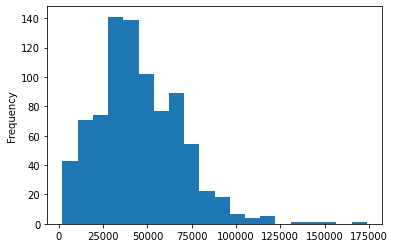

In [ ]:
df['Attendance'].plot(kind='hist', bins=20)

In [ ]:
df[ ['Attendance', 'Stadium'] ].sort_values('Attendance', ascending=False).head(10)


,Attendance,Stadium
74,173850.0,Maracan� - Est�dio Jornalista M�rio Filho
71,152772.0,Maracan� - Est�dio Jornalista M�rio Filho
63,142429.0,Maracan� - Est�dio Jornalista M�rio Filho
70,138886.0,Maracan� - Est�dio Jornalista M�rio Filho
379,114600.0,Estadio Azteca
411,114600.0,Estadio Azteca
397,114580.0,Estadio Azteca
407,114580.0,Estadio Azteca
409,114500.0,Estadio Azteca
367,110000.0,Estadio Azteca


In [ ]:
df2 = df[['Attendance', 'Stadium']].groupby('Stadium').sum().sort_values('Attendance', ascending=False).head(10)


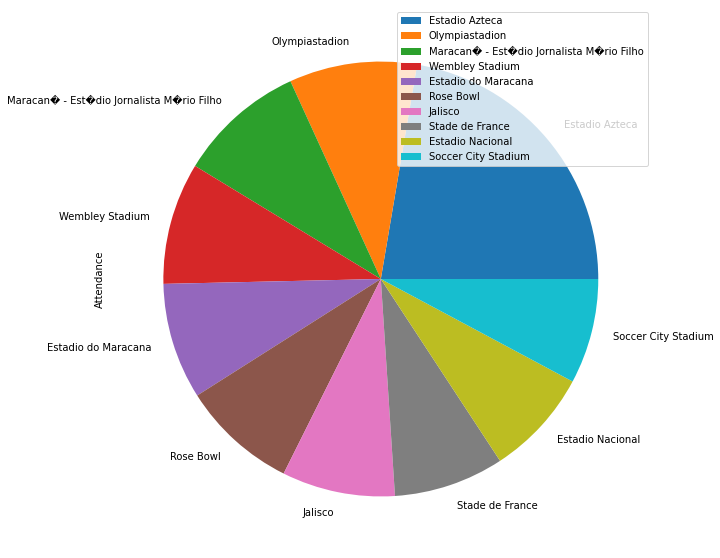

In [ ]:
df2.plot(kind='pie', y='Attendance', figsize=(10, 10))


In [ ]:
df[df['City'] == 'Salvador ']

# df['City'].unique()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Nueva_col
774,2014,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,...,1,1,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255931,300186510,ESP,NED,0.2
783,2014,16 Jun 2014 - 13:00,Group G,Arena Fonte Nova,Salvador,Germany,4,0,Portugal,,...,3,0,MAZIC Milorad (SRB),RISTIC Milovan (SRB),DJURDJEVIC Dalibor (SRB),255931,300186475,GER,POR,inf
796,2014,20 Jun 2014 - 16:00,Group E,Arena Fonte Nova,Salvador,Switzerland,2,5,France,,...,0,3,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255931,300186514,SUI,FRA,0.4
813,2014,25 Jun 2014 - 13:00,Group F,Arena Fonte Nova,Salvador,"rn"">Bosnia and Herzegovina",3,1,IR Iran,,...,1,0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255931,300186464,BIH,IRN,3.0
830,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,NaN
835,2014,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2,1,USA,Belgium win after extra time,...,0,0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951,300186497,BEL,USA,2.0
843,2014,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2,1,USA,Belgium win after extra time,...,0,0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951,300186497,BEL,USA,2.0
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),...,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,NaN


In [ ]:
df.count() # 852

df_sin_duplicados = df.drop_duplicates()

df_sin_duplicados.count()

Year                    836
Datetime                836
Stage                   836
Stadium                 836
City                    836
Home Team Name          836
Home Team Goals         836
Away Team Goals         836
Away Team Name          836
Win conditions          836
Attendance              835
Half-time Home Goals    836
Half-time Away Goals    836
Referee                 836
Assistant 1             836
Assistant 2             836
RoundID                 836
MatchID                 836
Home Team Initials      836
Away Team Initials      836
Nueva_col               766
dtype: int64

### Operaciones con DataFrame

Como ya intuímos, un DataFrame nos ofrece muchas facilidades, algunas de ellas:


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

(852, 21)

In [ ]:
df.iloc[10:20]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Nueva_col
10,1930,19 Jul 1930 - 15:00,Group 1,Estadio Centenario,Montevideo,Argentina,6,3,Mexico,,...,3,1,SAUCEDO Ulises (BOL),ALONSO Gualberto (URU),RADULESCU Constantin (ROU),201,1086,ARG,MEX,2.0
11,1930,20 Jul 1930 - 13:00,Group 2,Estadio Centenario,Montevideo,Brazil,4,0,Bolivia,,...,1,0,BALWAY Thomas (FRA),MATEUCCI Francisco (URU),VALLEJO Gaspar (MEX),201,1091,BRA,BOL,inf
12,1930,20 Jul 1930 - 15:00,Group 4,Estadio Centenario,Montevideo,Paraguay,1,0,Belgium,,...,1,0,VALLARINO Ricardo (URU),MACIAS Jose (ARG),LOMBARDI Domingo (URU),201,1089,PAR,BEL,inf
13,1930,21 Jul 1930 - 14:50,Group 3,Estadio Centenario,Montevideo,Uruguay,4,0,Romania,,...,4,0,REGO Gilberto (BRA),WARNKEN Alberto (CHI),SAUCEDO Ulises (BOL),201,1100,URU,ROU,inf
14,1930,22 Jul 1930 - 14:45,Group 1,Estadio Centenario,Montevideo,Argentina,3,1,Chile,,...,2,1,LANGENUS Jean (BEL),CRISTOPHE Henry (BEL),SAUCEDO Ulises (BOL),201,1084,ARG,CHI,3.0
15,1930,26 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Argentina,6,1,USA,,...,1,0,LANGENUS Jean (BEL),VALLEJO Gaspar (MEX),WARNKEN Alberto (CHI),202,1088,ARG,USA,6.0
16,1930,27 Jul 1930 - 14:45,Semi-finals,Estadio Centenario,Montevideo,Uruguay,6,1,Yugoslavia,,...,3,1,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),BALWAY Thomas (FRA),202,1101,URU,YUG,6.0
17,1930,30 Jul 1930 - 14:15,Final,Estadio Centenario,Montevideo,Uruguay,4,2,Argentina,,...,1,2,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405,1087,URU,ARG,2.0
18,1934,27 May 1934 - 16:30,Preliminary round,Stadio Benito Mussolini,Turin,Austria,3,2,France,Austria win after extra time,...,0,0,VAN MOORSEL Johannes (NED),CAIRONI Camillo (ITA),BAERT Louis (BEL),204,1104,AUT,FRA,1.5
19,1934,27 May 1934 - 16:30,Preliminary round,Giorgio Ascarelli,Naples,Hungary,4,2,Egypt,,...,2,2,BARLASSINA Rinaldo (ITA),DATTILO Generoso (ITA),SASSI Otello (ITA),204,1119,HUN,EGY,2.0


Incluso podemos graficar el DataFrame, esto por que pandas utilizar por detras la librería Matplotlib

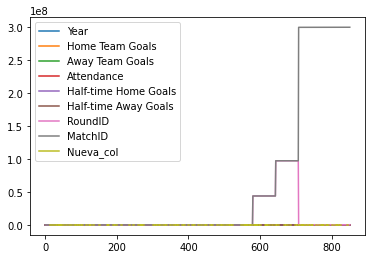

In [ ]:
df.plot()

### Pandas posee herramientas para tratar series temporales

Creamos datos aleatorios y los graficamos

In [32]:
import numpy as np

In [34]:
datos = np.random.rand(240)
datos

array([1.57574541e-01, 5.35093675e-01, 9.75231608e-02, 6.75315805e-02,
       8.13021716e-01, 2.65609939e-02, 3.34869758e-02, 1.11780661e-01,
       2.96836468e-01, 4.57367123e-03, 6.34518015e-01, 8.17726995e-02,
       5.33767127e-01, 2.86833161e-01, 3.46182341e-01, 7.96186370e-01,
       2.09548871e-01, 4.99797784e-01, 3.72632100e-02, 1.64478690e-01,
       3.37047516e-01, 2.90273168e-01, 9.77909427e-01, 9.26875378e-01,
       3.03532968e-01, 9.60506519e-01, 4.56559522e-01, 3.82590197e-01,
       4.30420677e-01, 6.86329516e-02, 1.41285730e-01, 8.26117013e-01,
       7.59393525e-01, 6.65057446e-01, 3.32396566e-01, 7.48175696e-01,
       9.18211877e-01, 7.78882983e-01, 2.41017106e-01, 5.20653671e-01,
       6.18930894e-01, 2.36273413e-01, 6.57416995e-01, 7.86207830e-01,
       8.66883497e-01, 4.62800458e-01, 3.89219991e-01, 3.67254776e-01,
       7.68583285e-01, 9.34252841e-01, 9.98462905e-01, 3.19014597e-01,
       6.50870986e-02, 5.66231691e-01, 9.42728735e-01, 4.41706304e-01,
      

RangeIndex(start=0, stop=240, step=1)


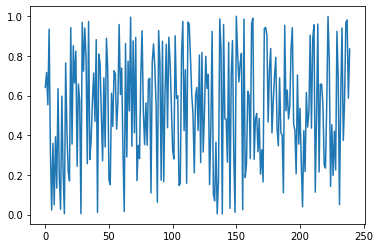

In [33]:
mi_nueva_serie = pd.Series(datos)
mi_nueva_serie.plot()
print(mi_nueva_serie.index)

### Podemos crear un listado de fechas eligiendo una fecha inicial y seleccionando una frecuencia

Utilizamos la funcion `pd.date_range()` para generar el listado.

In [35]:
indice = pd.date_range('2019-04',freq='1h',periods=len(datos))
indice


DatetimeIndex(['2019-04-01 00:00:00', '2019-04-01 01:00:00',
               '2019-04-01 02:00:00', '2019-04-01 03:00:00',
               '2019-04-01 04:00:00', '2019-04-01 05:00:00',
               '2019-04-01 06:00:00', '2019-04-01 07:00:00',
               '2019-04-01 08:00:00', '2019-04-01 09:00:00',
               ...
               '2019-04-10 14:00:00', '2019-04-10 15:00:00',
               '2019-04-10 16:00:00', '2019-04-10 17:00:00',
               '2019-04-10 18:00:00', '2019-04-10 19:00:00',
               '2019-04-10 20:00:00', '2019-04-10 21:00:00',
               '2019-04-10 22:00:00', '2019-04-10 23:00:00'],
              dtype='datetime64[ns]', length=240, freq='H')

In [36]:
serie_tiempo = pd.Series(datos, index=indice)
print(serie_tiempo)

2019-04-01 00:00:00    0.157575
2019-04-01 01:00:00    0.535094
2019-04-01 02:00:00    0.097523
2019-04-01 03:00:00    0.067532
2019-04-01 04:00:00    0.813022
                         ...   
2019-04-10 19:00:00    0.275891
2019-04-10 20:00:00    0.445650
2019-04-10 21:00:00    0.898318
2019-04-10 22:00:00    0.804324
2019-04-10 23:00:00    0.861273
Freq: H, Length: 240, dtype: float64


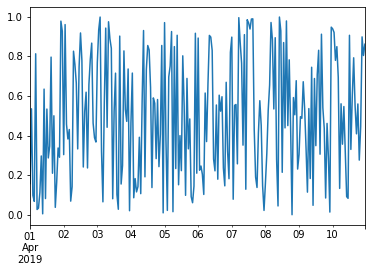

In [42]:
serie_tiempo.plot()

##### Podemos realizar un Upsampling de nuestros datos, es decir, cambiar la frencuencia de nuestros datos por una frecuencia mayor

In [44]:
# upsampling
serie_tiempo.resample('30min').asfreq()

2019-04-01 00:00:00    0.157575
2019-04-01 00:30:00         NaN
2019-04-01 01:00:00    0.535094
2019-04-01 01:30:00         NaN
2019-04-01 02:00:00    0.097523
                         ...   
2019-04-10 21:00:00    0.898318
2019-04-10 21:30:00         NaN
2019-04-10 22:00:00    0.804324
2019-04-10 22:30:00         NaN
2019-04-10 23:00:00    0.861273
Freq: 30T, Length: 479, dtype: float64

##### Tambien podemos disminuir la frecuencia de los datos

In [45]:
# Downsampling
serie_tiempo.resample('3h').asfreq()

2019-04-01 00:00:00    0.157575
2019-04-01 03:00:00    0.067532
2019-04-01 06:00:00    0.033487
2019-04-01 09:00:00    0.004574
2019-04-01 12:00:00    0.533767
                         ...   
2019-04-10 09:00:00    0.317477
2019-04-10 12:00:00    0.906399
2019-04-10 15:00:00    0.792685
2019-04-10 18:00:00    0.559527
2019-04-10 21:00:00    0.898318
Freq: 3H, Length: 80, dtype: float64

##### Podemos realizar operaciones con ventanas deslizantes

In [46]:
serie_tiempo.head(10)

2019-04-01 00:00:00    0.157575
2019-04-01 01:00:00    0.535094
2019-04-01 02:00:00    0.097523
2019-04-01 03:00:00    0.067532
2019-04-01 04:00:00    0.813022
2019-04-01 05:00:00    0.026561
2019-04-01 06:00:00    0.033487
2019-04-01 07:00:00    0.111781
2019-04-01 08:00:00    0.296836
2019-04-01 09:00:00    0.004574
Freq: H, dtype: float64

In [54]:
serie_tiempo.rolling(6).mean()

2019-04-01 00:00:00         NaN
2019-04-01 01:00:00         NaN
2019-04-01 02:00:00         NaN
2019-04-01 03:00:00         NaN
2019-04-01 04:00:00         NaN
                         ...   
2019-04-10 19:00:00    0.530863
2019-04-10 20:00:00    0.505758
2019-04-10 21:00:00    0.523364
2019-04-10 22:00:00    0.565403
2019-04-10 23:00:00    0.640830
Freq: H, Length: 240, dtype: float64

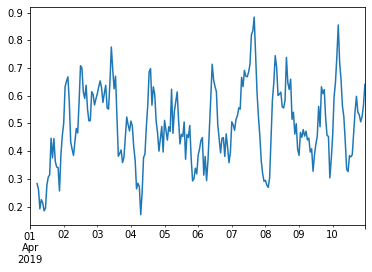

In [55]:
serie_tiempo.rolling(6).mean().plot()

In [53]:
serie_tiempo[2:8].mean()

0.19165084808985236